In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression

**EDA**

After cleaning, the next step in many data science projects is exploratory data analysis (EDA), 
- where you get a feel for your data by summarizing its main characteristics using descriptive statistics and data visualization. 
- A good way to plan your EDA is by looking each column and asking yourself questions what it says about your dataset.

Let us Import our clean Mexico Data;

In [14]:
df = pd.read_csv("C:/Users/Tsegi/Desktop/AAC_SCHOOL/DSProject/br/BrazilData_clean.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22844 entries, 0 to 22843
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  22844 non-null  object 
 1   region         22844 non-null  object 
 2   area_m2        22844 non-null  int64  
 3   price_usd      22844 non-null  float64
 4   lat            22844 non-null  float64
 5   lon            22844 non-null  float64
 6   state          22844 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.2+ MB


In [16]:
df['area_m2'] = df['area_m2'].astype(float)

In [18]:
print(df.dtypes)

property_type     object
region            object
area_m2          float64
price_usd        float64
lat              float64
lon              float64
state             object
dtype: object


- there are only two `dtypes` in our DataFrame (`object` and `float64`), 
- there are three categories of  data: `location`, `categorical`, and `numeric`. 
    - Each of these require a different kind of exploration in our analysis. 

### Location Data: `"lat"` and `"lon"`

- It is known that the most important thing in real estate is location, 
- Since latitude and longitude are based on a coordinate system, a good way to visualize them is to create a scatter plot on top of a map. A great tool for this is the `scatter_mapbox`

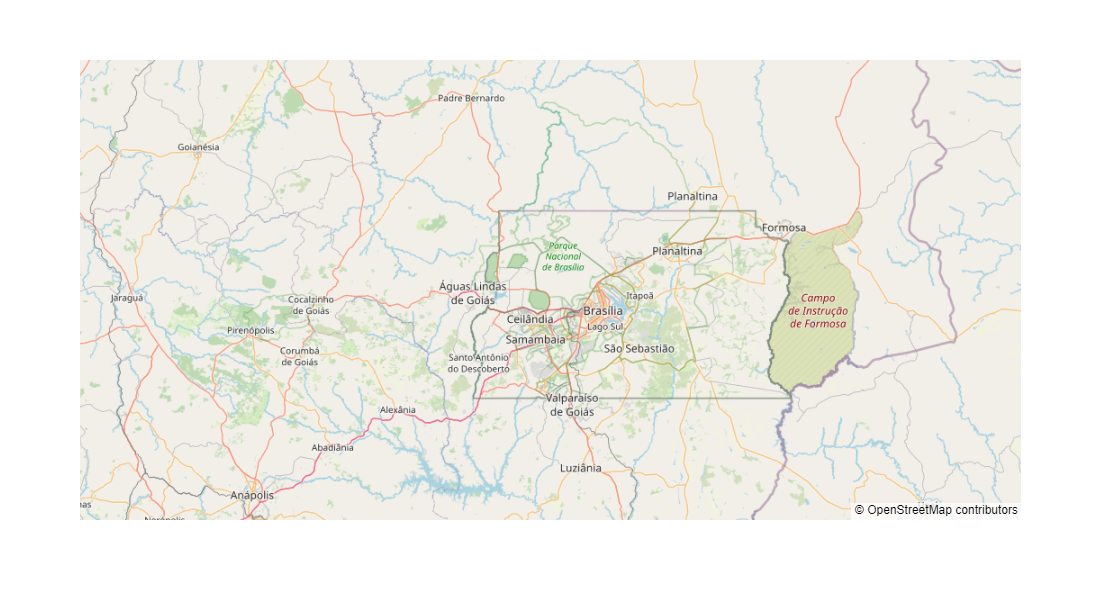

In [21]:

fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="lat",
    lon="lon",
    center={"lat": -15.79, "lon": -47.88},  # Map will be centered on Mexico City
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

Plotly's Python graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.

- C:\Users\user>pip install plotly==5.20.0         
- python        
- import plotly

Looking at this map, 
- are the houses in our dataset distributed evenly throughout the country, or 
- are there states or regions that are more prevalent? 
- Can you guess where Mexico's biggest cities are based on this distribution?

In [22]:
df["state"].head()

0    Alagoas
1    Alagoas
2    Alagoas
3    Alagoas
4    Alagoas
Name: state, dtype: object

In [23]:
df["state"].nunique()

25

In [24]:
df["state"].unique()

array(['Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná',
       'Paraíba', 'Pará', 'Pernambuco', 'Piauí', 'Rio Grande do Norte',
       'Rio Grande do Sul', 'Rio de Janeiro', 'Rondônia',
       'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins'],
      dtype=object)

Use the [`value_counts`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) method on the `"state"` column to determine the 10 most prevalent states in our dataset.

In [25]:
df["state"].value_counts()

state
Minas Gerais           2680
São Paulo              2656
Rio Grande do Sul      2643
Rio de Janeiro         2642
Santa Catarina         2634
Paraná                 2544
Bahia                  2045
Ceará                  1574
Distrito Federal        732
Espírito Santo          555
Goiás                   555
Pernambuco              406
Rio Grande do Norte     302
Pará                    299
Paraíba                 250
Maranhão                101
Mato Grosso              86
Sergipe                  68
Alagoas                  24
Piauí                    24
Mato Grosso do Sul       14
Rondônia                  5
Amazonas                  3
Amapá                     1
Tocantins                 1
Name: count, dtype: int64

In [26]:
df["state"].value_counts().head(10)

state
Minas Gerais         2680
São Paulo            2656
Rio Grande do Sul    2643
Rio de Janeiro       2642
Santa Catarina       2634
Paraná               2544
Bahia                2045
Ceará                1574
Distrito Federal      732
Espírito Santo        555
Name: count, dtype: int64

### Numerical Data: `"area_m2"` and `"price_usd"`

- Now, we have a sense for where the houses in our dataset are located, 
- but how much do they cost? How big are they? The best way to answer those questions is looking at descriptive statistics. 

**Task 1.3.4:** Use the [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to print the mean, standard deviation, and quartiles for the `"area_m2"` and `"price_usd"` columns.

In [27]:
df.describe()

,area_m2,price_usd,lat,lon
count,22844.000000,22844.000000,22844.000000,22844.000000
mean,115.020224,157425.349342,-34.434509,-45.338626
std,47.742932,87677.121309,10.920473,4.835724
min,53.000000,47719.250000,-60.057747,-63.905184
25%,76.000000,92456.050000,-43.945608,-49.236000
50%,103.000000,133216.240000,-34.840789,-46.574148
75%,142.000000,198830.210000,-23.707746,-43.099617
max,252.000000,524246.390000,-5.044685,-34.804455


In [28]:
df[["area_m2","price_usd"]].describe()

,area_m2,price_usd
count,22844.000000,22844.000000
mean,115.020224,157425.349342
std,47.742932,87677.121309
min,53.000000,47719.250000
25%,76.000000,92456.050000
50%,103.000000,133216.240000
75%,142.000000,198830.210000
max,252.000000,524246.390000


In [29]:
df['area_m2'].quantile([0.3])

0.3    80.0
Name: area_m2, dtype: float64

**looking at `"area_m2"`**
- It's interesting that the mean is larger than the median (another name for the 50% quartile). Both of these statistics are supposed to give an idea of the "typical" value for the column, so why is there a difference of almost 14 m2 between them? 
- To answer this question, we need to see how house sizes are distributed in our dataset. 
- Let's look at two ways to visualize the distribution: a histogram and a boxplot.

Create a histogram of `"area_m2"`.

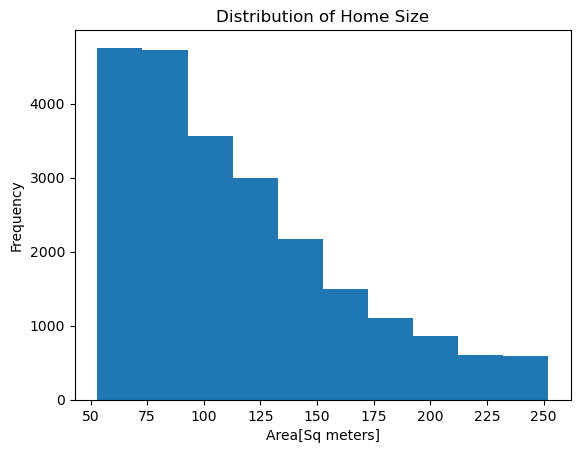

In [30]:
plt.hist(df["area_m2"])
plt.xlabel("Area[Sq meters]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Size");

we can see that `"area_m2"` skews left. 
- In other words, there are more houses at the lower end of the distribution (50–200m<sup>2</sup>) than at the higher end (250–400m<sup>2</sup>). 
- That explains the difference between the mean and the median.

 Create a horizontal boxplot of `"area_m2"`.

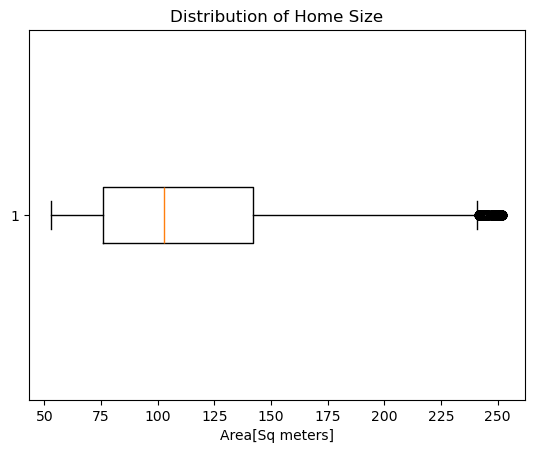

In [31]:
plt.boxplot(df["area_m2"],vert=False)
plt.xlabel("Area[Sq meters]")
plt.title("Distribution of Home Size");

**looking at `"price_usd"`** 

Does `"price_usd"` have the same distribution as `"price_per_m2"`? Let's use the same two visualization tools to find out.

Create a histogram of `"price_usd"`.

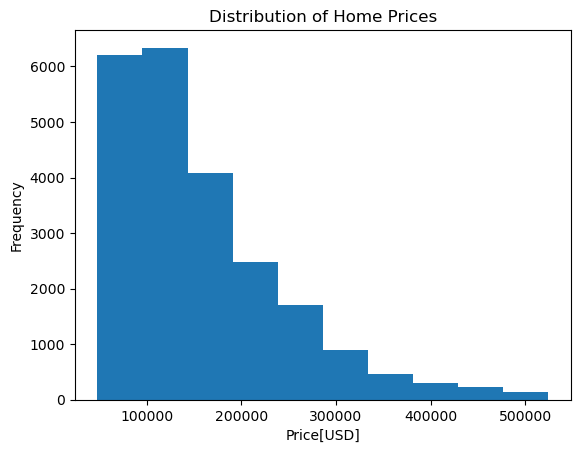

In [32]:
plt.hist(df["price_usd"])
plt.xlabel("Price[USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Prices");

Looks like `"price_usd"` is even more skewed than `"area_m2"`. What does this bigger skew look like in a boxplot?

Create a horizontal boxplot of `"price_usd"`. 

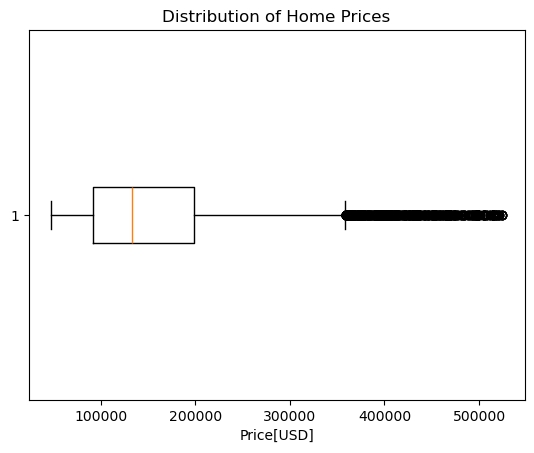

In [33]:
plt.boxplot(df["price_usd"],vert=False)
plt.xlabel("Price[USD]")
plt.title("Distribution of Home Prices");

- Now that you have a sense of for the dataset, 
- Next, start answering some research questions about the relationship between house size, price, and location.

[Basic Statistics Reference](https://www.scribbr.com/statistics/)